In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import gurobipy as gp
import ta
import quantstats as qs
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

from gurobi_optimods.datasets import load_sharpe_ratio
from gurobi_optimods.sharpe_ratio import max_sharpe_ratio
from multiprocessing import Pool
from multiprocessing import cpu_count

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

import warnings

# 原本是：
# utils._in_notebook(matplotlib_inline=True)

# 改成：
# utils._in_notebook(matplotlib_inline=False)


warnings.filterwarnings("ignore", category=FutureWarning, module="numpy")
warnings.filterwarnings("ignore", category=FutureWarning, module="quantstats")
warnings.filterwarnings("ignore", message="dropping on a non-lexsorted multi-index")
pd.set_option('future.no_silent_downcasting', True)


[*********************100%***********************]  41 of 41 completed
[*********************100%***********************]  1 of 1 completed


AA start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


AAPL start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


AIG start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


AMGN start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


AXP start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


BA start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


BAC start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


C start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


CAT start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


CSCO start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


CVX start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


DD start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


DIS start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


FL start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


GE start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


GS start from 1999-05-04 00:00:00


[*********************100%***********************]  1 of 1 completed


GT start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


HD start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


HON start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


HPQ start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


IBM start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


INTC start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


IP start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


JNJ start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


JPM start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


KO start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


MCD start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


MMM start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


MO start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


MRK start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


MSFT start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


NKE start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


PFE start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


PG start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


T start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


TRV start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


UNH start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


VZ start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


WBA start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


WMT start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed


XOM start from 1994-01-03 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


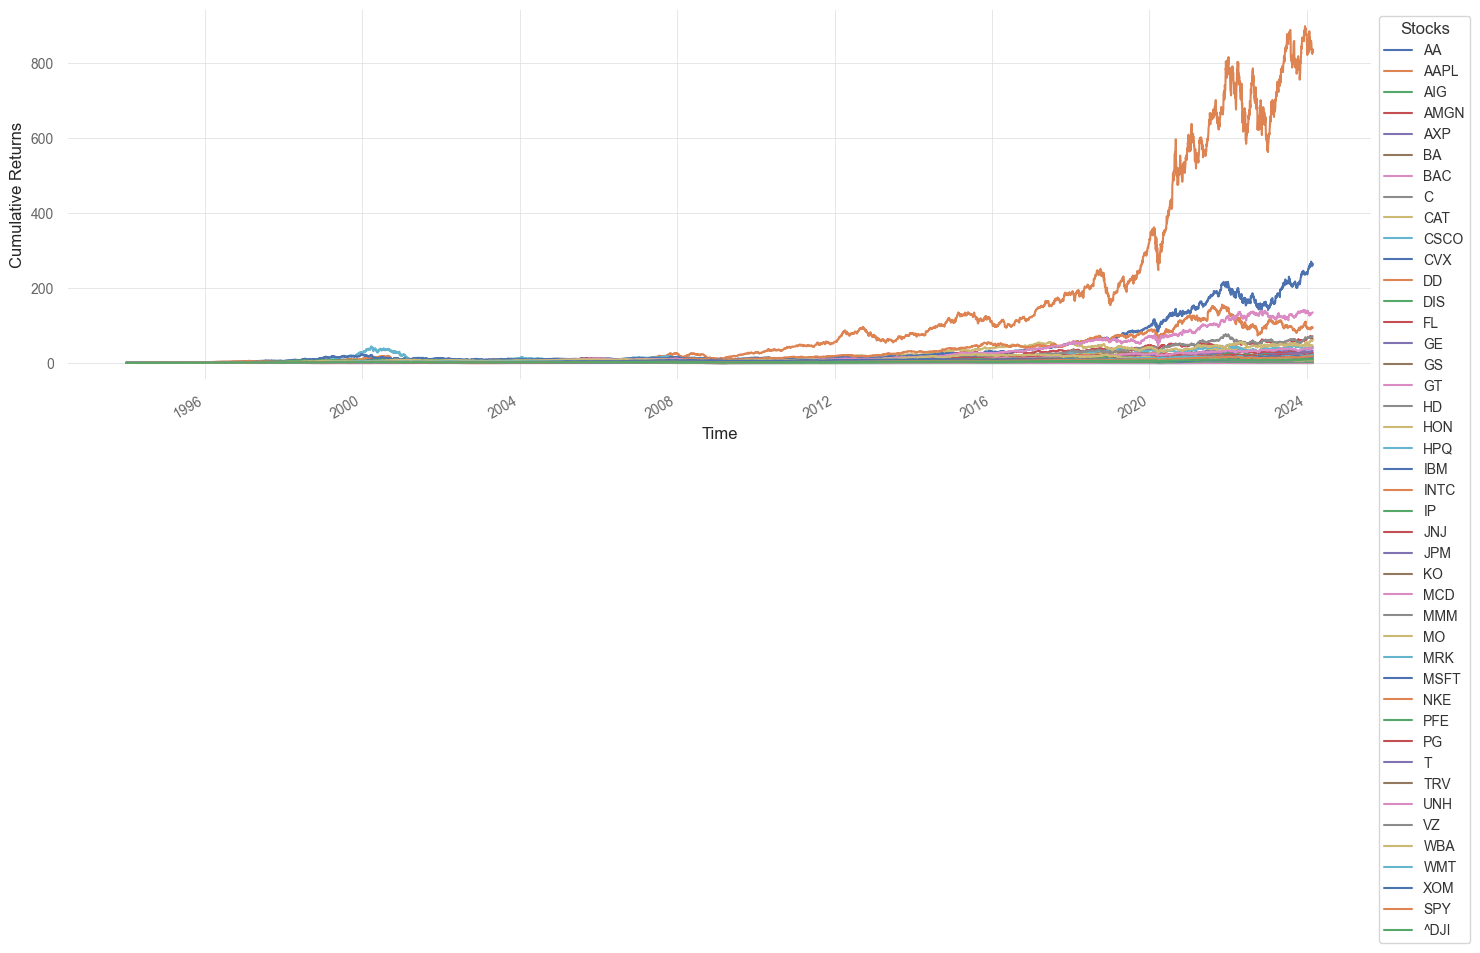

/Users/yl/Library/Caches/pypoetry/virtualenvs/latent-variable-estimation-black-litterman-nYrKQsor-py3.10/lib/python3.10/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2
/Users/yl/Library/Caches/pypoetry/virtualenvs/latent-variable-estimation-black-litterman-nYrKQsor-py3.10/lib/python3.10/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2
/Users/yl/Library/Caches/pypoetry/virtualenvs/latent-variable-estimation-black-litterman-nYrKQsor-py3.10/lib/python3.10/site-packages/ta/trend.py:1030: FutureWarning: Series.

Allocation: 
lookback = 50
GR_n: 359
Lookback = 50. Decision right after 1994-03-31 00:00:00 is on 1994-03-31 00:00:00:
Lookback = 50. Decision right after 1994-04-29 00:00:00 is on 1994-04-29 00:00:00:
Lookback = 50. Decision right after 1994-05-31 00:00:00 is on 1994-05-31 00:00:00:
Lookback = 50. Decision right after 1994-06-30 00:00:00 is on 1994-06-30 00:00:00:
Lookback = 50. Decision right after 1994-07-29 00:00:00 is on 1994-07-29 00:00:00:
Lookback = 50. Decision right after 1994-08-31 00:00:00 is on 1994-08-31 00:00:00:
Lookback = 50. Decision right after 1994-09-30 00:00:00 is on 1994-09-30 00:00:00:
Lookback = 50. Decision right after 1994-10-31 00:00:00 is on 1994-10-31 00:00:00:
Lookback = 50. Decision right after 1994-11-30 00:00:00 is on 1994-11-30 00:00:00:
Lookback = 50. Decision right after 1994-12-30 00:00:00 is on 1994-12-30 00:00:00:
Lookback = 50. Decision right after 1995-01-31 00:00:00 is on 1995-01-31 00:00:00:
Lookback = 50. Decision right after 1995-02-28 00:

<Axes: xlabel='Date'>

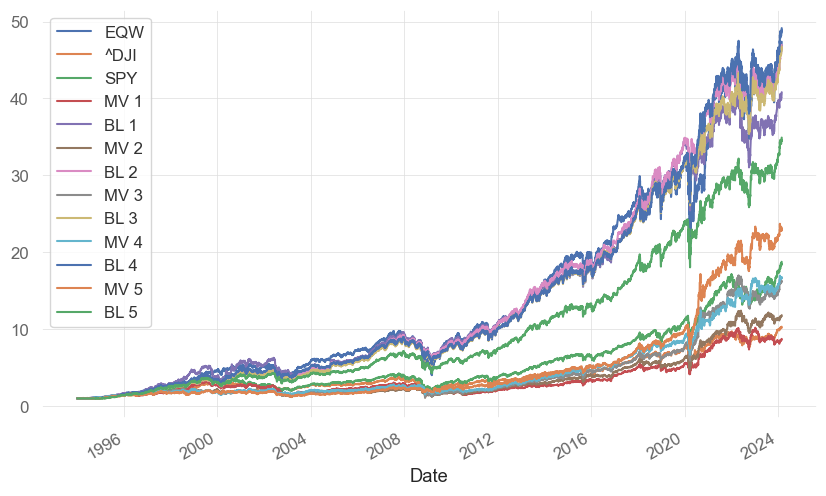

In [11]:

benchmark = ['^DJI','SPY']
dji_components = {
    # Historical components of the Dow Jones Industrial Average: https://en.wikipedia.org/wiki/Historical_components_of_the_Dow_Jones_Industrial_Average
    "1991-05-06": ["AA", "AXP", "BA", "CAT", "CVX", "DD", "DIS", "FL", "GE", "GT", "HON", "IBM", "IP", "JPM", "KO", "MCD", "MMM", "MO", "MRK", "PG", "T", "XOM"],
    #add "HPQ", "JNJ", "TRV", "WMT"; remove "FL"
    "1997-03-17": ["AA", "AXP", "BA", "CAT", "CVX", "DD", "DIS", "GE", "GT", "HON", "HPQ", "IBM", "IP", "JNJ", "JPM", "KO", "MCD", "MMM", "MO", "MRK", "PG", "T", "TRV", "WMT", "XOM"],
    #add "C", "HD", "INTC", "MSFT"; remove "CVX", "GT", "TRV"
    "1999-11-01": ["AA", "AXP", "BA", "C", "CAT", "DD", "DIS", "GE", "HD", "HON", "HPQ", "IBM", "INTC", "IP", "JNJ", "JPM", "KO", "MCD", "MMM", "MO", "MRK", "MSFT", "PG", "T", "WMT", "XOM"],
    #add "AIG", "PFE", "VZ"; remove "IP"
    "2004-04-08": ["AA", "AIG", "AXP", "BA", "C", "CAT", "DD", "DIS", "GE", "HD", "HON", 'HPQ', "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MO", "MRK", "MSFT", "PFE", "PG", "T", "VZ", "WMT", "XOM"],
    #add "BAC", "CVX"; remove "HON", "MO"
    "2008-02-19": ["AA", "AIG", "AXP", "BA", "BAC", "C", "CAT", "CVX", "DD", "DIS", "GE", "HD", "HPQ", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "PFE", "PG", "T", "VZ", "WMT", "XOM"],
    #remove "AIG"
    "2008-09-22": ["AA", "AXP", "BA", "BAC", "C", "CAT", "CVX", "DD", "DIS", "GE", "HD", "HPQ", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "PFE", "PG", "T", "VZ", "WMT", "XOM"],
    #add "TRV", "CSCO"; remove "C"
    "2009-06-08": ["AA", "AXP", "BA", "BAC", "CAT", "CSCO", "CVX", "DD", "DIS", "GE", "HD", "HPQ", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "PFE", "PG", "T", "TRV", "VZ", "WMT", "XOM"],
    #add "UNH"
    "2012-09-24": ["AA", "AXP", "BA", "BAC", "CAT", "CSCO", "CVX", "DD", "DIS", "GE", "HD", "HPQ", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "PFE", "PG", "T", "TRV", "UNH", "VZ", "WMT", "XOM"],
    #add "GS", "NKE"; remove "AA", "BAC", "HPQ"
    "2013-09-23": ["AXP", "BA", "CAT", "CSCO", "CVX", "DD", "DIS", "GE", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE", "PG", "T", "TRV", "UNH", "VZ", "WMT", "XOM"],
    #add "AAPL"; remove "T"
    "2015-03-19": ["AXP", "AAPL", "BA", "CAT", "CSCO", "CVX", "DD", "DIS", "GE", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV", "UNH", "VZ", "WMT", "XOM"],
    #add "WBA"; remove "GE"
    "2018-06-26": ["AXP", "AAPL", "BA", "CAT", "CSCO", "CVX", "DD", "DIS", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV", "UNH", "VZ", "WBA", "WMT", "XOM"],
    #remove "DD"
    "2019-04-02": ["AXP", "AAPL", "BA", "CAT", "CSCO", "CVX", "DIS", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV", "UNH", "VZ", "WBA", "WMT", "XOM"],
    #add "AMGN", "HON"; remove "XOM", "PFE"
    "2020-08-31": ["AXP", "AAPL", "AMGN", "BA", "CAT", "CSCO", "CVX", "DIS", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PG", "TRV", "UNH", "VZ", "WBA", "WMT"],
    
    "Union": ['AA', 'AIG', 'AAPL', 'AMGN', 'AXP', 'BA', 'BAC', 'C', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', "FL", 'GE', 'GS', "GT", 'HD', 'HON', 'HPQ', 'IBM', 'INTC', 'IP',
              'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MO', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'T', 'TRV', 'UNH', 'VZ', 'WBA', 'WMT', 'XOM'],
    #Non-existing or Inaccessible stock data
    "Removed" : ["BS", 'CRM', 'DOW', 'DWDP', "EK", 'GM', "KHC", 'S', 'SBC', "TX", 'UK', 'UTX', 'V', "WX"],
}
sp_components = {
    "1998-12-22": ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY'],
    #add "XLRE"
    "2015-10-08": ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XLRE'],
    #add "XLC"
    "2018-06-19": ['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XLRE'],
    
    # Add future changes here...
    "Union": ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XLC', 'XLRE'],
    "Removed" : [],
}


# SPDR/DJIA Dataset
_components = dji_components
_update_date = list(_components.keys())[:-2]
stocks = sorted(_components["Union"])

# Start-End date
data_start = '1991-01-01'
decision_start = '1994-01-01'
end = '2024-02-25'

# Global Samples
Gprice_data_cp = yf.download(stocks,start=data_start,end=end, auto_adjust=False)

data = pd.DataFrame()
# Fetch the data for each stock and concatenate it to the `data` DataFrame
for stock in stocks:
    raw = yf.download(stock, start=decision_start, end=end, auto_adjust=False)
    print(f'{stock} start from {raw.index[0]}')
    raw['Symbol'] = stock  # Add a column indicating the stock symbol
    data = pd.concat([data, raw], axis=0)
pivoted_data = data.pivot_table(index='Date', columns='Symbol', values='Adj Close').loc[decision_start:]
pivoted_data.columns = pivoted_data.columns.droplevel() #drop multi-level
df = pivoted_data
df_returns = df.pct_change().iloc[1:]
df = df.loc[df_returns.index]

# 
bdata = pd.DataFrame()
for bm in benchmark:
    braw = yf.download(bm, start=df.index[0], end=df.index[-1], auto_adjust=False)
    braw['Symbol'] = bm  # Add a column indicating the stock symbol
    bdata = pd.concat([bdata, braw], axis=0)
bpivoted_data = bdata.pivot_table(index='Date', columns='Symbol', values='Adj Close').loc[decision_start:]
bpivoted_data.columns = bpivoted_data.columns.droplevel() #drop multi-level
bdf = bpivoted_data

bdf_returns = bdf.pct_change().iloc[1:]
bdf = bdf.loc[bdf_returns.index]


fig, ax = plt.subplots(figsize=(20, 8))
(1+df_returns).cumprod().plot(ax=ax)
(1+bdf_returns).cumprod().plot(ax=ax)
leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title='Stocks')
plt.setp(leg.get_title(), fontsize=12) # Set legend title fontsize
ax.set_xlabel('Time', fontsize=12) # Adjust x-axis label fontsize
ax.set_ylabel('Cumulative Returns', fontsize=12) # Adjust y-axis label fontsize
ax.tick_params(axis='both', which='major', labelsize=10) # Adjust tick label fontsize
plt.tight_layout(rect=[0, 0, 0.75, 1]) # Adjust layout to make room for legend
plt.show()


def equalweighting(df_returns, exclude):
    # Get the assets by excluding the specified column
    assets = df_returns.columns[df_returns.columns != exclude]
    # Calculate equal weights for the assets
    weights = np.array([1/len(assets)]*len(assets))

    # Calculate and add the portfolio returns to df_returns
    strategy = df_returns
    strategy['portfolio'] = df_returns[assets].mul(weights, axis=1).sum(axis=1)
    return strategy
eqw = [equalweighting(df_returns.copy(), None)]

def plot_performance(strategy_list=None, portfolio='portfolio', variant=None):
    # Plot cumulative returns
    fig, ax = plt.subplots()
    
    BM = bdf.loc[strategy_list[0][1].sum(1)>0]
    (BM/BM.iloc[0]).plot(ax=ax)
    
    if strategy_list!=None:
        (1+eqw[0]['portfolio'][strategy_list[0][1].sum(1)>0][1:]).cumprod().plot(ax=ax, label='equal_weight')
        for i, strategy in enumerate(strategy_list):
            (1+strategy[0][portfolio][strategy_list[0][1].sum(1)>0]).cumprod().plot(ax=ax, label=f'BL {i+1}')
            if(variant != None):
                for var in variant:
                    (1+strategy[0][var][strategy_list[0][1].sum(1)>0]).cumprod().plot(ax=ax, label=f'MV {i+1}')
    else:
        (1+eqw[0][portfolio]).cumprod().plot(ax=ax, label='equal_weight')
    ax.set_title('Cumulative Returns')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Returns')
    ax.legend()
    plt.show()
    return None
    
def plot_arrays(index, *arrays, labels=None, title='Plot', xlabel='Index', ylabel='Values'):
    """
    Plots multiple arrays against a shared index.
    """
    plt.figure(figsize=(10, 6))
    for i, array in enumerate(arrays):
        plt.plot(index, array, label=labels[i] if labels else f'Array {i+1}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# plot_arrays(R_index, array1, array2, array3, labels=['Array 1', 'Array 2', 'Array 3'])



def plot_allocation_professional(df_weights):
    df_weights = df_weights.fillna(0).ffill()
    df_weights[df_weights < 0] = 0

    # Define a fixed order and color for each asset (ticker)
    ordered_assets = [
        'XLY', 'XLV', 'XLU', 'XLRE', 'XLP',
        'XLK', 'XLI', 'XLF', 'XLE', 'XLC', 'XLB'
    ]

    color_dict = {
        'XLY': '#1f77b4',  # blue
        'XLV': '#ff7f0e',  # orange
        'XLU': '#2ca02c',  # green
        'XLRE': '#d62728', # red
        'XLP': '#9467bd',  # purple
        'XLK': '#8c564b',  # brown
        'XLI': '#e377c2',  # pink
        'XLF': '#7f7f7f',  # gray
        'XLE': '#bcbd22',  # yellow-green
        'XLC': '#17becf',  # cyan
        'XLB': '#aec7e8',  # light blue
    }

    # Filter and reorder dataframe based on fixed asset list
    df_weights = df_weights[[a for a in ordered_assets if a in df_weights.columns]]

    # Prepare colors in the right order
    colors = [color_dict[a] for a in df_weights.columns]

    # Plotting
    fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
    df_weights.plot.area(ax=ax, color=colors, linewidth=0)

    # Formatting
    ax.set_xlabel('Date', fontsize=30)
    ax.set_ylabel('Portfolio Weight', fontsize=30)
    ax.set_title('Asset Allocation Over Time', fontsize=35)

    # Time axis formatting
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='x', labelsize=22)  # Make y-axis tick labels larger
    ax.tick_params(axis='y', labelsize=22)  # Make y-axis tick labels larger

    # Y-axis and grid
    ax.set_ylim(0, 1)
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    # Legend
    ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=22)

    plt.tight_layout()
    plt.savefig('asset_allocation_plot.eps', format='eps')
    plt.show()


p = 9                # number of indicators

def calculate_indicators(stock_data, stock_name=''):
    stock_data = stock_data.dropna()
    
    # Existing Indicators
    atr = ta.volatility.AverageTrueRange(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close']).average_true_range()
    adx = ta.trend.ADXIndicator(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close']).adx()
    ema = ta.trend.EMAIndicator(close=stock_data['Adj Close']).ema_indicator()
    macd = ta.trend.MACD(close=stock_data['Adj Close']).macd()
    sma = ta.trend.SMAIndicator(close=stock_data['Adj Close'], window=20).sma_indicator()
    rsi = ta.momentum.RSIIndicator(close=stock_data['Adj Close']).rsi()

    # Additional Indicators
    bb = ta.volatility.BollingerBands(close=stock_data['Close'])
    stoch = ta.momentum.StochasticOscillator(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'])
    cci = ta.trend.CCIIndicator(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'])
    psar = ta.trend.PSARIndicator(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'])
    obv = ta.volume.OnBalanceVolumeIndicator(close=stock_data['Close'], volume=stock_data['Volume']).on_balance_volume()
    obv_norm = obv / (obv.max() - obv.min())

    # Combining all indicators into a single DataFrame
    tag = f"_{stock_name}" if stock_name else ""  # Handling the case where stock_name might be empty
    indicators_df = pd.DataFrame({
        f'ATR{tag}': atr,                           #Diverse
        f'ADX{tag}': adx,
        f'EMA{tag}': ema,
        f'MACD{tag}': macd,
        f'SMA{tag}': sma,
        f'RSI{tag}': rsi,                           #Diverse
        f'BB_Upper{tag}': bb.bollinger_hband(),     #Diverse
        f'BB_Lower{tag}': bb.bollinger_lband(),     #Diverse
        #f'BB_MAVG{tag}': bb.bollinger_mavg(),
        #f'STOCH_K{tag}': stoch.stoch(),
        #f'STOCH_D{tag}': stoch.stoch_signal(),
        #f'CCI{tag}': cci.cci(),
        #f'PSAR{tag}': psar.psar(),
        f'OBV_Norm{tag}' : obv_norm                 #Diverse
    })

    indicators_df = indicators_df.dropna() # drop nan
    indicators_df = indicators_df.loc[(indicators_df!=0).all(axis=1)] # drop 0

    return indicators_df

Sample_Set = [calculate_indicators(Gprice_data_cp.xs(stocks[0], axis=1, level=1),stock_name=f'{stocks[0]}')]
for j in range(1, len(stocks)):
    Sample_Set.append( calculate_indicators(Gprice_data_cp.xs(stocks[j], axis=1, level=1), stock_name=f'{stocks[j]}') )
Gx = pd.concat(Sample_Set, axis=1, keys=stocks)

##############################################################################################


def one_stock_SVR(price_data_cp, X,  name):
    stock_data_train = price_data_cp.xs(name, axis=1, level=1)
    
    #X_train_raw = calculate_indicators(stock_data_train) #Replace with the following:
    X_train_raw = X[name]
    Y_train_raw = price_data_cp['Adj Close'][name]
    
    # Probably don't need this anymore (avoid bad sample):
    X_train = X_train_raw.dropna()
    Y_train = Y_train_raw.loc[X_train.index]
    
    svr = SVR(kernel='linear')
    svr.fit(X_train, Y_train)
    
    # Model Parameter
    #weights = [estimator.coef_ for estimator in svr.estimators_]
    #intercepts = [estimator.intercept_ for estimator in svr.estimators_]
    weights = svr.coef_
    intercepts = svr.intercept_
    # Converting weights and intercepts into a matrix and a vector respectively
    weights = np.vstack(weights)  # Stacking weights vertically to form a matrix

    variance = np.var(X_train, axis = 0).values
    return weights, intercepts, variance

def arima_prediction(R, order=(2, 1, 2)) -> np.ndarray:
    predictions = []
    errors = []

    for column in R.columns:
        with warnings.catch_warnings():
            # Ignore all warnings during the ARIMA model fitting
            warnings.simplefilter("ignore")
            
            # Fit ARIMA model to the column
            model = ARIMA(R[column].values, order=order)
            fitted_model = model.fit()
    
            # Forecast the next value
            forecast = fitted_model.forecast(steps=1)
            predictions.append(forecast[0])
    
            # Calculate prediction error using mean squared error on training data
            fitted_values = fitted_model.fittedvalues
            mse = mean_squared_error(R[column][1:], fitted_values[1:])  # Skip the first element to align
            errors.append(mse)
        
    q = predictions
    Omega = np.diag(errors)
    return q, Omega

def rolling_train(R, X, trstart, trend):
    n = len(R.index)
    d = len(R.columns)
    # SVR and Bandwidth matrix
    B = np.zeros((d, d*p))
    a = np.zeros(d)
    
    h = (4/(d*p+2))**(2/(d*p+4)) * n**(-2/(d*p+4))
    h_list = np.array([])
    H_Tilde = np.zeros((d*p,d*p))
    price_data_cp = (Gprice_data_cp.loc[:, (slice(None), list(R.columns))])[trstart:trend]
    for j, name in enumerate(R.columns):
        weights, intercepts, var = one_stock_SVR(price_data_cp, X, name)
        B[j][p*j:p*(j+1)] = weights
        a[j] = intercepts[0]
        h_list = np.append(h_list, h*var)
    #print(f"{d} SVR")
    #print(trend)
    H_Tilde = np.diag(h_list)
    Lambda = B @ H_Tilde @ B.T
    
    return Lambda, B, a

def feature_regression(R: pd.DataFrame, X: pd.DataFrame) -> tuple:
    """
    Performs linear regression for each asset in R on its corresponding features in X.
    Returns intercepts, coefficients, and the error covariance matrix.
    
    Parameters:
        R (pd.DataFrame): DataFrame of dependent variables (e.g., asset returns).
        X (pd.DataFrame): DataFrame of asset-specific features (exogenous variables).
        
    Returns:
        tuple: Three items:
            - intercepts: pd.Series of intercepts for each asset.
            - coefficients: np.ndarray containing coefficients for each asset's features.
            - Lambda: np.ndarray diagonal error covariance matrix.
    """
    intercepts = {}
    coefficients = {}
    residual_variances = []
    
    p = X.shape[1] // len(R.columns)  # Number of features per asset
    
    # Iterate over each asset (column) in R
    for asset in R.columns:
        # Select the subset of columns in X related to the current asset
        x_asset = X[asset].dropna()
        R_asset = R[asset][x_asset.index]
        
        # Set up the linear regression model
        model = LinearRegression()
        
        # Fit the model to the asset-specific data
        model.fit(x_asset, R_asset)
        
        # Calculate residuals and their variance
        residuals = R_asset - model.predict(x_asset)
        residual_variances.append(np.var(residuals, ddof=1))
        
        # Store the intercept and coefficients
        intercepts[asset] = model.intercept_
        coefficients[asset] = model.coef_
        
    # Create intercepts Series and coefficient matrix
    a = pd.Series(intercepts)
    B = np.zeros((len(R.columns), len(R.columns) * p))
    for j, (asset, value) in enumerate(coefficients.items()):
        B[j][p * j : p * (j + 1)] = value
    
    # Create the diagonal error covariance matrix
    Lambda = np.diag(residual_variances)
    
    return a, B, Lambda


def KL_sample(R):
    #R = df_returns.iloc[0:n+1]     #first R
    n = len(R.index)
    tau = 1 # Bigger = focus on original MV
    pi = R.mean().values
    Sigma = R.cov().values
    d = len(R.columns)
    P = np.eye(d)           # portfolio weight
    X = Gx[R.columns].loc[R.index]      # X: feature sample
    x = Gx[R.columns].loc[R.index].pct_change().ffill().fillna(0)     # x: X derivatives
    Pc = df[R.columns].loc[R.index]
    
    # SVR Kernel
    Lambda_k, B_k, a_k = rolling_train(R, X, R.index[0], R.index[-1])
    E_ft, V_ft = X.mean(), X.cov()
    q_k = a_k + B_k @ E_ft
    # q_k = (q_k - Pc.iloc[-1])/Pc.iloc[-1]
    Sigma_f_k = B_k @ V_ft @ B_k.T

    a, B, Xi = feature_regression(Pc, X)
    E_ft, V_ft = X.mean(), X.cov()
    Pct = a + B @ E_ft
    q = (Pct - Pc.iloc[-1])/Pc.iloc[-1]
    Sigma_f = B @ V_ft @ B.T
    
    Error_k = Lambda_k
    variance_k = Sigma + np.linalg.pinv(np.linalg.pinv(Sigma*tau) + P.T @ np.linalg.pinv(Error_k) @ P)
    mean_k = variance_k @ (np.linalg.pinv(Sigma*tau) @ pi + P.T @ np.linalg.pinv(Error_k) @ q_k)
    
    Uncertainty = Xi
    variance = np.linalg.pinv(np.linalg.pinv(Sigma*tau) + P.T @ np.linalg.pinv(Uncertainty) @ P)
    mean = variance @ (np.linalg.pinv(Sigma*tau) @ pi + P.T @ np.linalg.pinv(Uncertainty) @ q)
    
    return mean_k, variance_k



def max_sharpe_MKW(R):
    cov_matrix = R.cov().values
    mean = R.mean().values
    d = len(R.columns)
    
    mu = mean
    Sigma = cov_matrix

    #mu, Sigma = KL_sample(R)
    
    with gp.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('DualReductions', 0)
        env.start()
        with gp.Model(env=env, name = "portfolio") as m:
            # m.params.NonConvex = 2
            # Long only
            y = m.addMVar(d, name="y", lb = 0, ub = gp.GRB.INFINITY)
            
            exp_return = y @ mu #MAX Sharpe
            variance = (y @ Sigma) @ y
            
            if np.all(mu < 0):
                return None
            else:
                m.setObjective(variance, gp.GRB.MINIMIZE)  # Minimize variance
                m.addConstr(exp_return == 1)  # Standard expected return constraint
    
            m.optimize()

            # Check if the status is INF_OR_UNBD (code 4)
            if m.status == gp.GRB.INF_OR_UNBD:
                print("Model status is INF_OR_UNBD. Reoptimizing with DualReductions set to 0.")
            
            solution = None
            # Check the optimization status
            if m.status == gp.GRB.OPTIMAL:
                # Extract solution
                y_opt = y.X  # Retrieve the solution as a numpy array
                solution = y_opt / y_opt.sum()

            elif m.status == gp.GRB.INF_OR_UNBD:
                print("Model is infeasible or unbounded.")
            else:
                print(f"Optimization ended with status: {m.status}")
                
            return solution

def max_sharpe_BL(R):   #Duplicate from max_sharpe_MKW() for multiprocessing purpose. Might be modified later.
    cov_matrix = R.cov().values
    mean = R.mean().values
    d = len(R.columns)
    mu, Sigma = KL_sample(R)
    
    with gp.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('DualReductions', 0)
        env.setParam('TimeLimit', 10)
        env.start()
        with gp.Model(env=env, name="portfolio") as m:
            # Long only constraint
            y = m.addMVar(d, name="y", lb=0, ub=gp.GRB.INFINITY)
    
            # Objective and constraints
            exp_return = y @ mu  # MAX Sharpe
            variance = (y @ Sigma) @ y  # Variance
    
            # Check if all values in mu are negative
            if np.all(mu < 0):
                return None
            else:
                m.setObjective(variance, gp.GRB.MINIMIZE)  # Minimize variance
                m.addConstr(exp_return == 1)  # Standard expected return constraint
            m.optimize()
    
            solution = None
            # Check the optimization status
            if m.status == gp.GRB.OPTIMAL:
                # Extract solution
                y_opt = y.X  # Retrieve the solution as a numpy array
                solution = y_opt / y_opt.sum()

            elif m.status == gp.GRB.INF_OR_UNBD:
                print("Model is infeasible or unbounded.")
            else:
                print(f"Optimization ended with status: {m.status}")
                
                                
            return solution

##############################################################################################

def BL(df, df_returns, lookback):
    print(f'lookback = {lookback}')
    rb_idx = df.groupby(df.index.strftime('%Y-%m')).head(1).index
    rb_daily = df.index
    #print(real_idx)
    
    # Initialize an empty DataFrame to store the weights
    weights_mv = pd.DataFrame(index=df.index, columns=df.columns)
    weights_bl = pd.DataFrame(index=df.index, columns=df.columns)
    
    strategy = df_returns.copy()
    strategy['portfolio mv'] = pd.Series(index=df.index, data=0.0)
    strategy['portfolio bl'] = pd.Series(index=df.index, data=0.0)


    rb_data = []
    # Loop over the rebalance dates
    for rb_date in rb_daily:
        rb_date_index = df.index.get_loc(rb_date)
        if rb_date_index > lookback:
            if rb_date in rb_idx:
                rb_date_parsed = rb_date.to_pydatetime()
                for date in sorted(_update_date, reverse=True):
                    if datetime.strptime(date, "%Y-%m-%d") <= rb_date_parsed:
                        _stocks = sorted(_components[date])
                        break
                rb_data.append((rb_date, rb_date_index, _stocks))
                

    GR_n = []
    for rb in rb_data:
        GR_n.append( df_returns[rb[2]].iloc[rb[1] - lookback:rb[1]].dropna(axis=1) )
    
    print(f'GR_n: {len(GR_n)}')
    
    for R_n in GR_n:
        
        #date = df.index[ df.index.get_loc(R_n.index[-1])+1 ]        
        #print(f'Lookback = {lookback}. Decision after {R_n.index[-1]} is on {date}:')
        
        date = df.index[ df.index.get_loc(R_n.index[-1]) ]        
        print(f'Lookback = {lookback}. Decision right after {date} is on {date}:')
        
        
        weights_mv.loc[date, R_n.columns] = max_sharpe_MKW(R_n)
        weights_mv.loc[date] = weights_mv.loc[date].fillna(0) # Elimiate NaN today to avoid ffill later.
        
        weights_bl.loc[date, R_n.columns] = max_sharpe_BL(R_n)
        weights_bl.loc[date] = weights_bl.loc[date].fillna(0) # Elimiate NaN today to avoid ffill later.
        
    weights_mv = weights_mv.ffill().fillna(0)
    weights_mv = weights_mv.infer_objects(copy=False)

    weights_bl = weights_bl.ffill().fillna(0)
    weights_bl = weights_bl.infer_objects(copy=False)

    
    for date_index in range(len(df)-1):
        bet_date = df.index[date_index]
        R_date = df.index[date_index + 1]
        strategy.loc[R_date, 'portfolio mv'] = np.sum(weights_mv.loc[bet_date] * df_returns.loc[R_date])
        strategy.loc[R_date, 'portfolio bl'] = np.sum(weights_bl.loc[bet_date] * df_returns.loc[R_date])
    
    return strategy, weights_mv, weights_bl


print('Allocation: ')
allocation = [BL(df.copy(), df_returns.copy(), lookback = 50),
              BL(df.copy(), df_returns.copy(), lookback = 80), 
              BL(df.copy(), df_returns.copy(), lookback = 100), 
              BL(df.copy(), df_returns.copy(), lookback = 120),
              BL(df.copy(), df_returns.copy(), lookback = 150),
              ]


portfolio = 'portfolio bl'
variant = ['portfolio mv']

df_bl = pd.DataFrame()
df_bl['EQW'] = eqw[0]['portfolio']
for _benchmark in benchmark:
    df_bl[_benchmark] = bdf_returns[_benchmark]
for i, value in enumerate(allocation):
    df_bl[f'MV {i+1}'] = value[0]['portfolio mv']
    df_bl[f'BL {i+1}'] = value[0]['portfolio bl']
    
(1+df_bl).cumprod().plot()


In [13]:
allocation[0][1]

Symbol,AA,AAPL,AIG,AMGN,AXP,BA,BAC,C,CAT,CSCO,...,NKE,PFE,PG,T,TRV,UNH,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1994-01-04,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
1994-01-05,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
1994-01-06,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
1994-01-07,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
1994-01-10,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-16,0.0,8.854112e-16,0.0,0.017007,0.041579,0.031207,0.0,0.0,0.06058,1.229650e-15,...,6.247340e-16,0.0,1.797580e-15,0.0,0.191007,5.947284e-15,0.122239,8.395327e-16,2.121169e-11,0.0
2024-02-20,0.0,8.854112e-16,0.0,0.017007,0.041579,0.031207,0.0,0.0,0.06058,1.229650e-15,...,6.247340e-16,0.0,1.797580e-15,0.0,0.191007,5.947284e-15,0.122239,8.395327e-16,2.121169e-11,0.0
2024-02-21,0.0,8.854112e-16,0.0,0.017007,0.041579,0.031207,0.0,0.0,0.06058,1.229650e-15,...,6.247340e-16,0.0,1.797580e-15,0.0,0.191007,5.947284e-15,0.122239,8.395327e-16,2.121169e-11,0.0


In [36]:
def plot_allocation_professional(df_weights):
    df_weights = df_weights.fillna(0).ffill()
    df_weights[df_weights < 0] = 0

    # Define a fixed order and color for each asset (ticker)
    ordered_assets = [
        'XLY', 'XLV', 'XLU', 'XLRE', 'XLP',
        'XLK', 'XLI', 'XLF', 'XLE', 'XLC', 'XLB'
    ]

    color_dict = {
        'XLY': '#1f77b4',  'XLV': '#ff7f0e',  'XLU': '#2ca02c',
        'XLRE': '#d62728', 'XLP': '#9467bd', 'XLK': '#8c564b',
        'XLI': '#e377c2',  'XLF': '#7f7f7f',  'XLE': '#bcbd22',
        'XLC': '#17becf',  'XLB': '#aec7e8',
    }

    # Filter and reorder dataframe based on fixed asset list
    selected_columns = [a for a in ordered_assets if a in df_weights.columns]
    df_weights = df_weights[selected_columns]
    df_weights = df_weights.loc[~(df_weights==0).all(axis=1)]
    # print(f"df_weights columns: {df_weights.columns}")


    # ✅ 若沒資料就跳過
    if df_weights.empty or df_weights.select_dtypes(include='number').empty:
        print("⚠️ Warning: No numeric data to plot for this allocation.")
        return

    # Prepare colors in the right order
    colors = [color_dict[a] for a in df_weights.columns]

    # Plotting
    fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
    df_weights.plot.area(ax=ax, color=colors, linewidth=0)

    # Formatting
    ax.set_xlabel('Date', fontsize=30)
    ax.set_ylabel('Portfolio Weight', fontsize=30)
    ax.set_title('Asset Allocation Over Time', fontsize=35)

    # Time axis formatting
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='x', labelsize=22)  # Make y-axis tick labels larger
    ax.tick_params(axis='y', labelsize=22)  # Make y-axis tick labels larger

    # Y-axis and grid
    ax.set_ylim(0, 1)
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    # Legend
    ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=22)

    plt.tight_layout()
    plt.savefig('asset_allocation_plot.eps', format='eps')
    plt.show()


for idx, w in enumerate(allocation):
    print(f"== Allocation {idx+1} ==")
    print("w[1] columns:", w[1].columns)
    print("w[2] columns:", w[2].columns)

for w in allocation:
    plot_allocation_professional(w[1])
    print(w[1])
    plot_allocation_professional(w[2])
    print(w[2])

== Allocation 1 ==
w[1] columns: Index(['AA', 'AAPL', 'AIG', 'AMGN', 'AXP', 'BA', 'BAC', 'C', 'CAT', 'CSCO',
       'CVX', 'DD', 'DIS', 'FL', 'GE', 'GS', 'GT', 'HD', 'HON', 'HPQ', 'IBM',
       'INTC', 'IP', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MO', 'MRK', 'MSFT',
       'NKE', 'PFE', 'PG', 'T', 'TRV', 'UNH', 'VZ', 'WBA', 'WMT', 'XOM'],
      dtype='object', name='Symbol')
w[2] columns: Index(['AA', 'AAPL', 'AIG', 'AMGN', 'AXP', 'BA', 'BAC', 'C', 'CAT', 'CSCO',
       'CVX', 'DD', 'DIS', 'FL', 'GE', 'GS', 'GT', 'HD', 'HON', 'HPQ', 'IBM',
       'INTC', 'IP', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MO', 'MRK', 'MSFT',
       'NKE', 'PFE', 'PG', 'T', 'TRV', 'UNH', 'VZ', 'WBA', 'WMT', 'XOM'],
      dtype='object', name='Symbol')
== Allocation 2 ==
w[1] columns: Index(['AA', 'AAPL', 'AIG', 'AMGN', 'AXP', 'BA', 'BAC', 'C', 'CAT', 'CSCO',
       'CVX', 'DD', 'DIS', 'FL', 'GE', 'GS', 'GT', 'HD', 'HON', 'HPQ', 'IBM',
       'INTC', 'IP', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MO', 'MRK', 'MSFT',
       '


==== Metrics for EQW ====
                           Strategy
-------------------------  ----------
Start Period               1994-01-04
End Period                 2024-02-23
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          4,637.93%
CAGR﹪                     9.23%

Sharpe                     0.75
Prob. Sharpe Ratio         100.0%
Smart Sharpe               0.71
Sortino                    1.08
Smart Sortino              1.01
Sortino/√2                 0.77
Smart Sortino/√2           0.72
Omega                      1.15

Max Drawdown               -58.9%
Longest DD Days            1157
Volatility (ann.)          19.53%
Calmar                     0.16
Skew                       -0.06
Kurtosis                   11.17

Expected Daily %           0.05%
Expected Monthly %         1.07%
Expected Yearly %          13.25%
Kelly Criterion            7.24%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.97%
Expected Shortfall (cVaR)  -1

/var/folders/l8/cns8rbyx5y17d2vn6gf6qkk80000gn/T/ipykernel_73011/4110673662.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{(np.exp(tick)-1)*100:.1f}%' for tick in ticks])


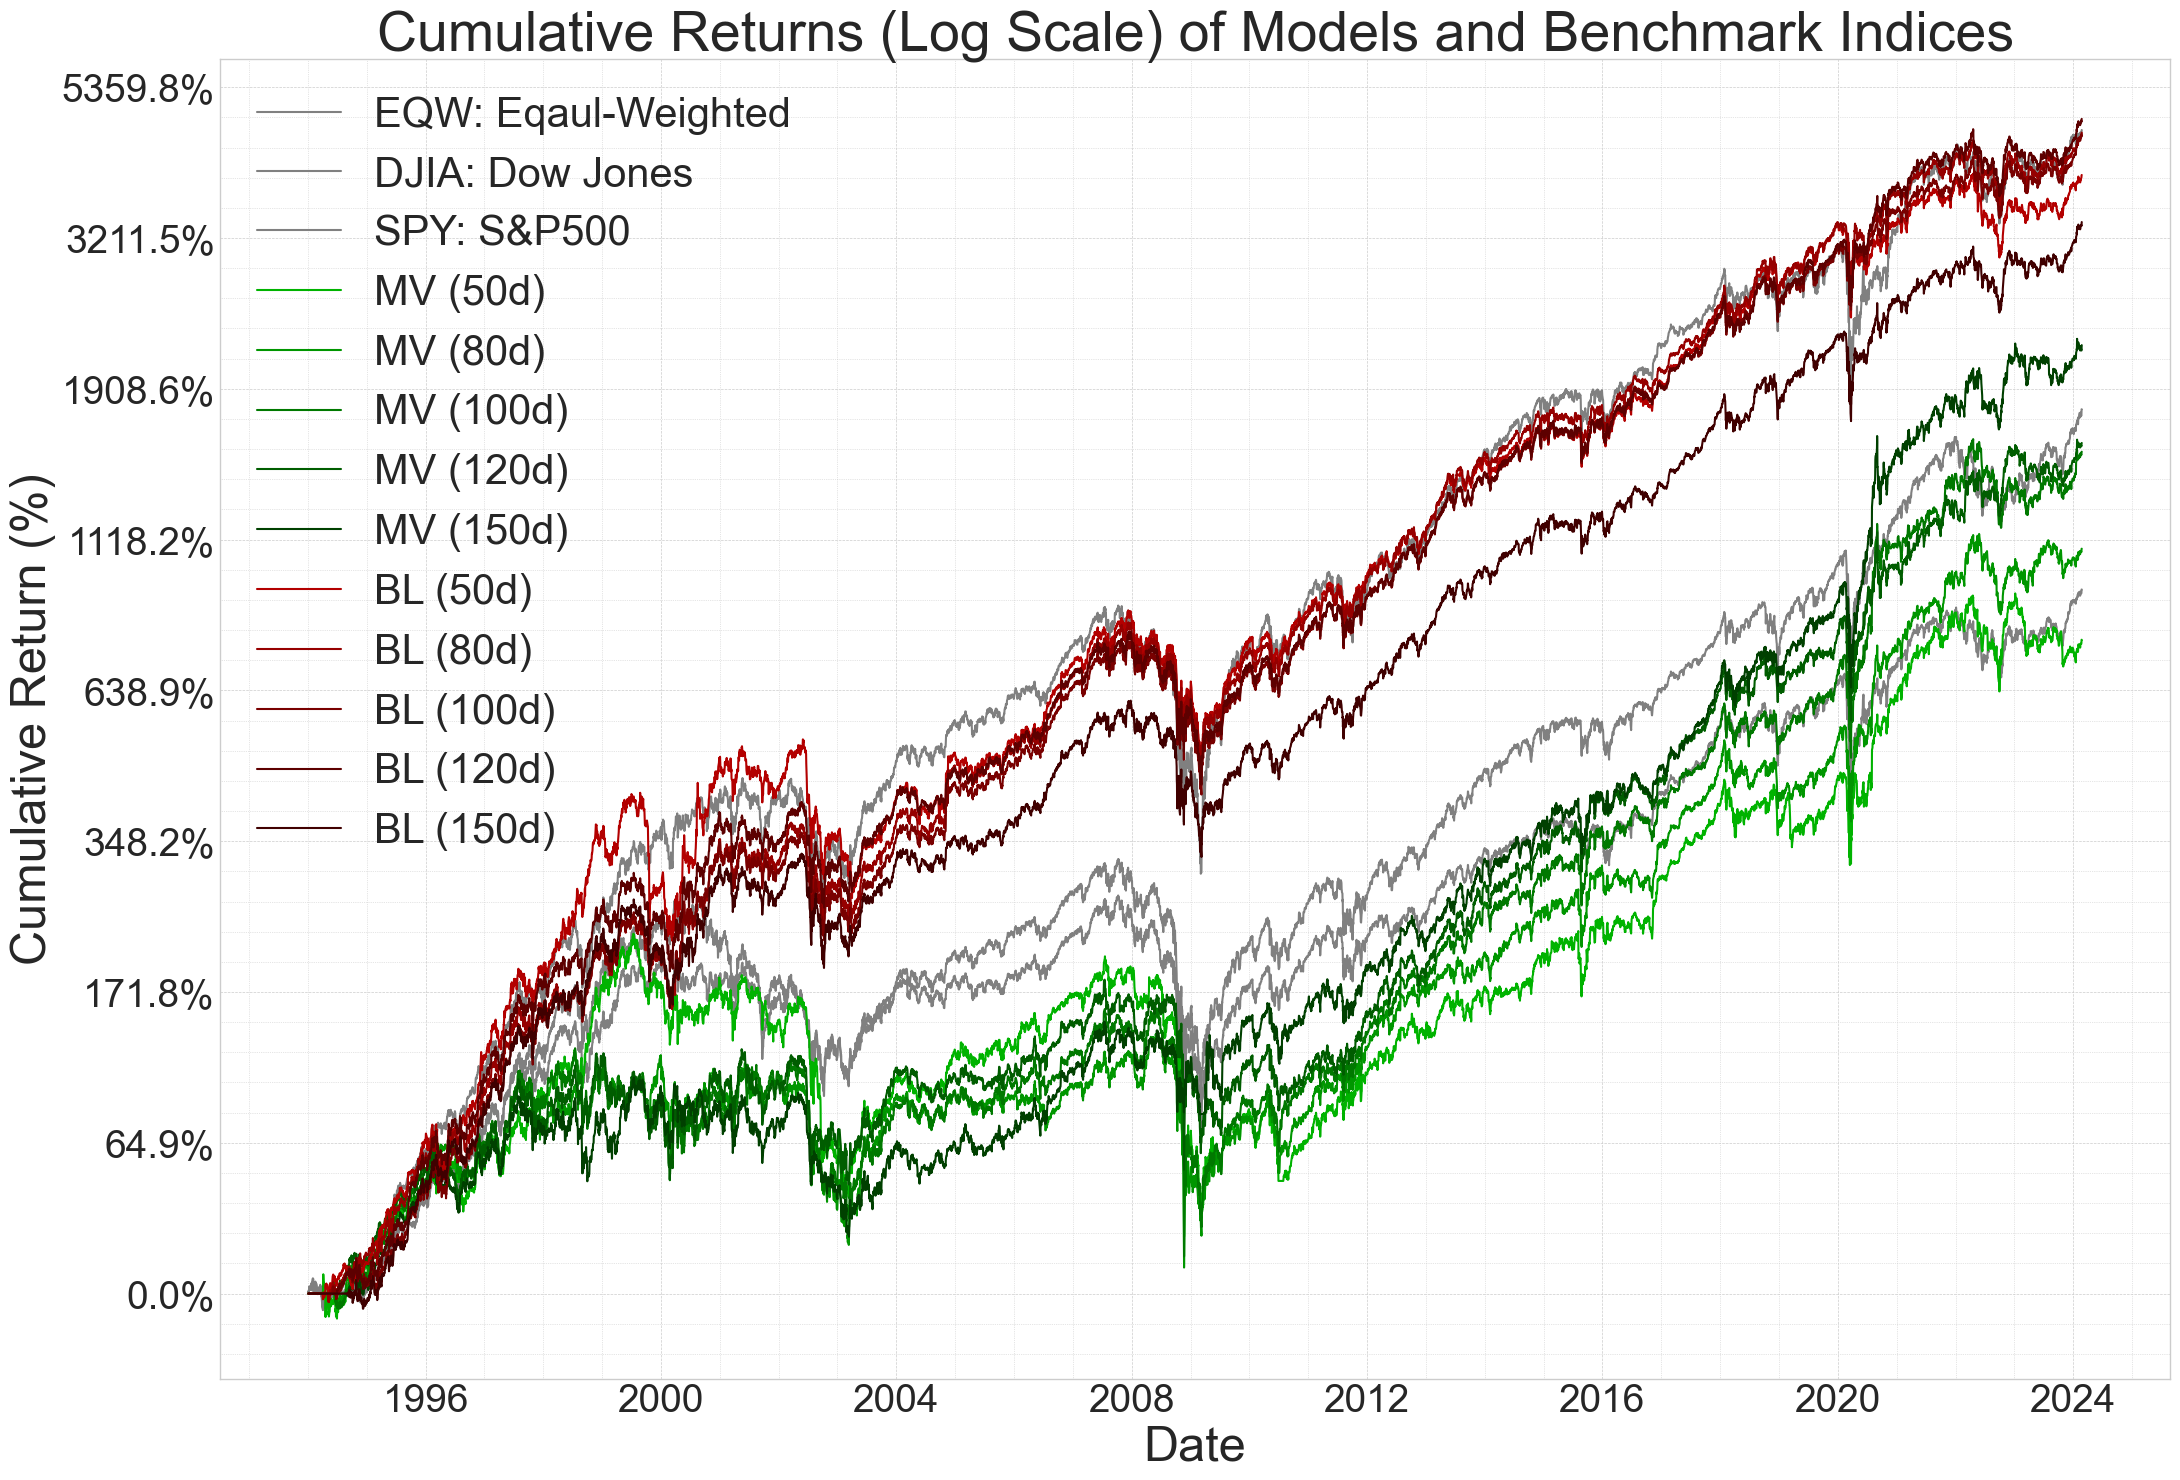

/var/folders/l8/cns8rbyx5y17d2vn6gf6qkk80000gn/T/ipykernel_73011/4110673662.py:113: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick*100:.1f}%' for tick in ticks])


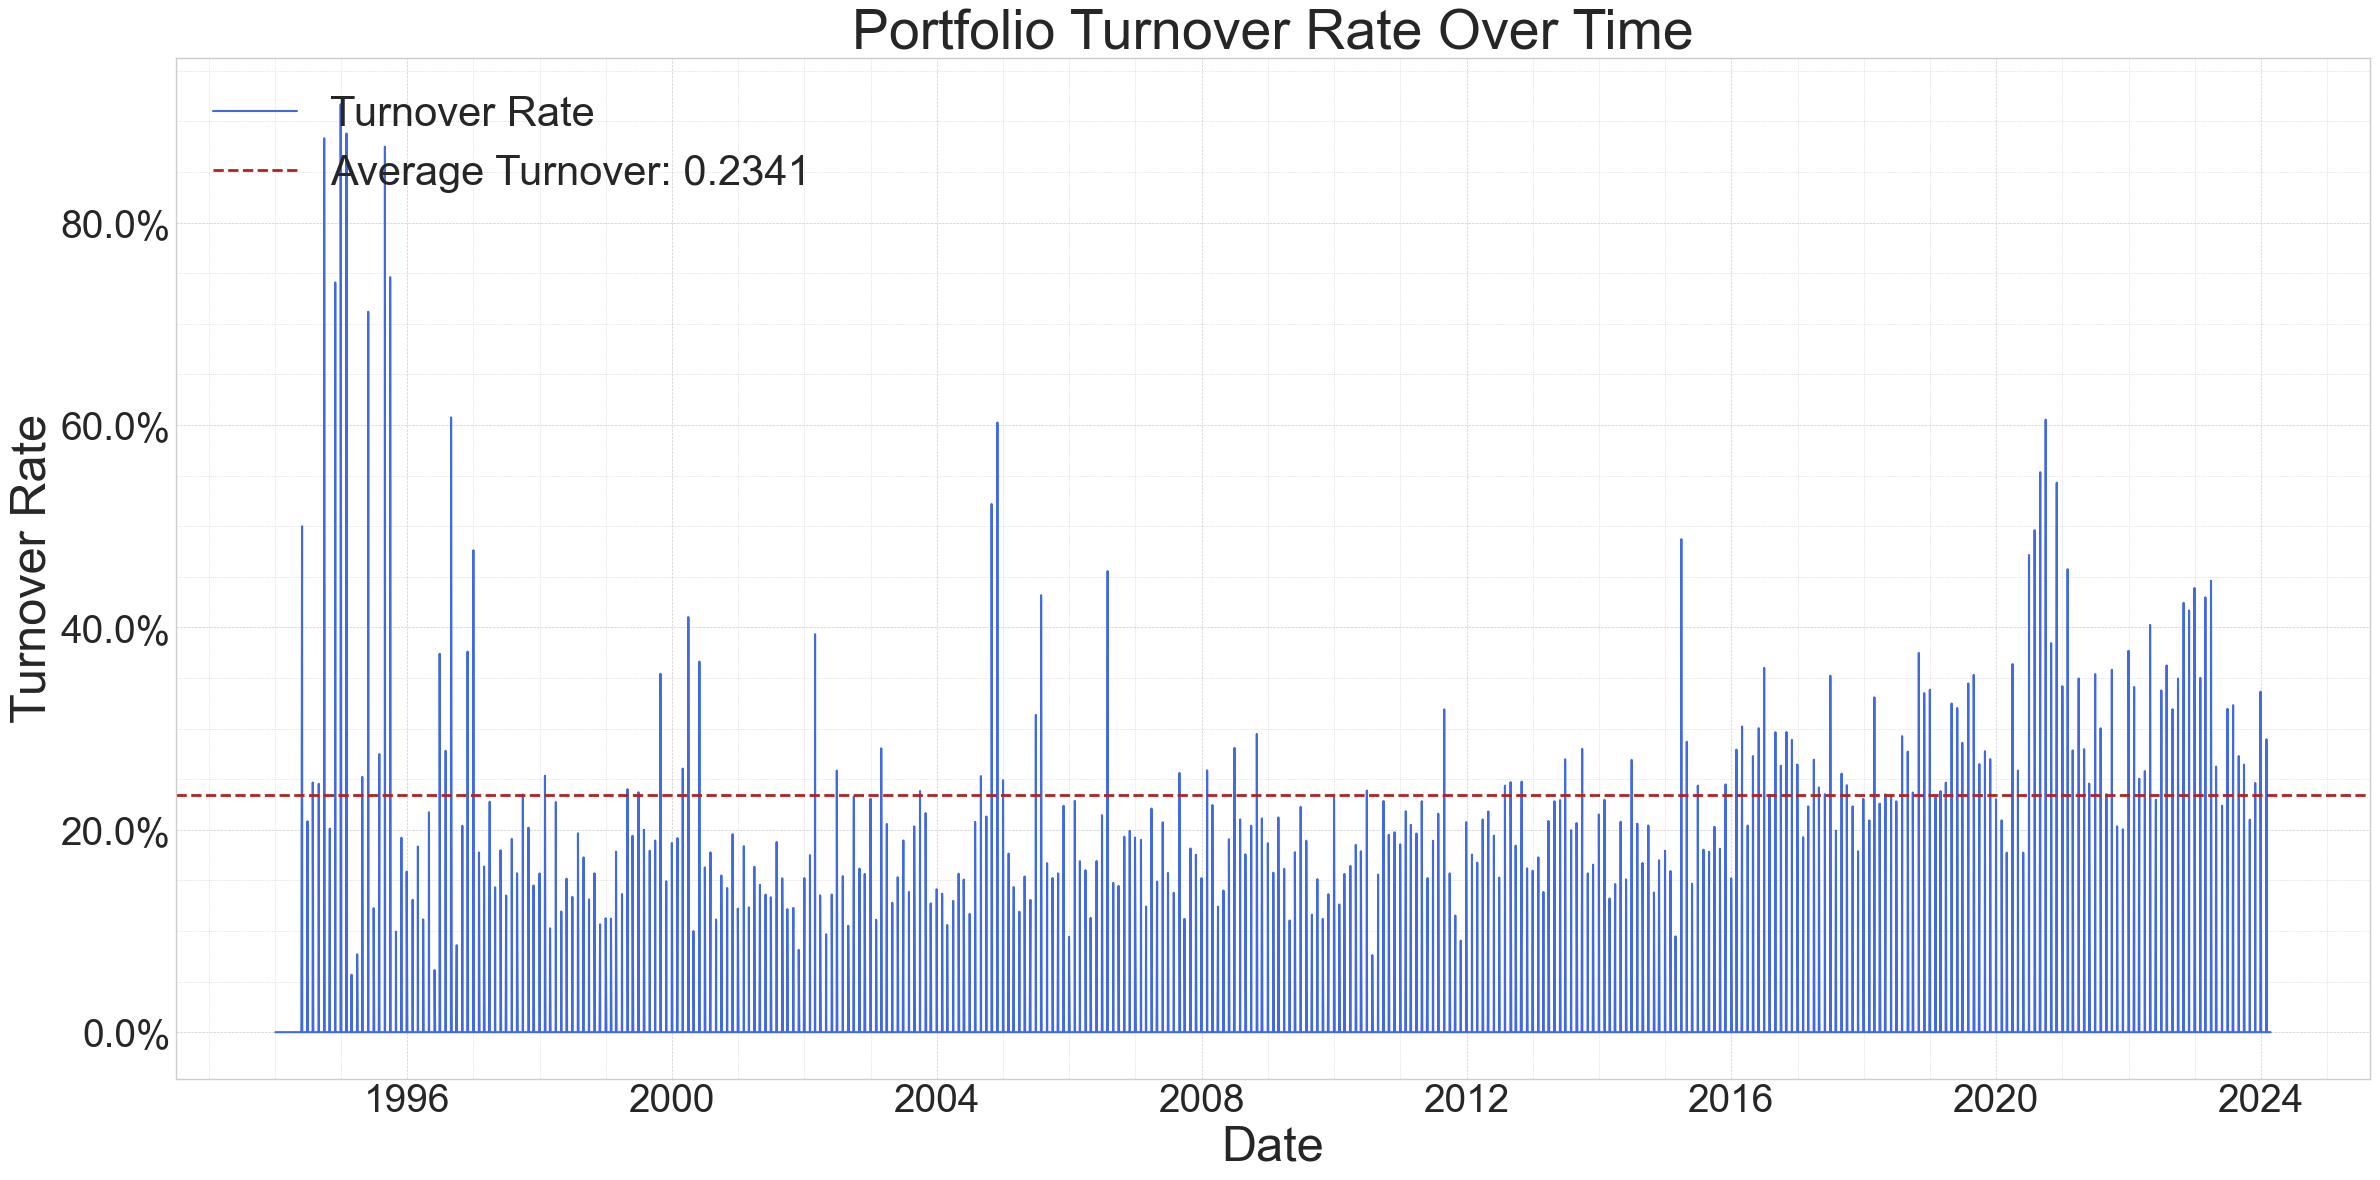

In [ ]:
# qs.reports.metrics(df_bl, mode="full", display=True)
for col in df_bl.columns:
    print(f"\n==== Metrics for {col} ====")
    qs.reports.metrics(df_bl[col], mode="full", display=True)


    
    
    
### Academic Log-Scale Cumulative Plot
    
# Prepare Data
df_clean = df_bl.drop(columns=[]).fillna(0)
log_cumulative_returns = np.log1p(df_clean).cumsum()

# Identify Columns by Group
bl_columns = [col for col in log_cumulative_returns.columns if "BL" in col]
mv_columns = [col for col in log_cumulative_returns.columns if "MV" in col]
other_columns = [
    col for col in log_cumulative_returns.columns 
    if col not in bl_columns + mv_columns
]

# Define Colors and Line Styles
bl_color_base = (0.7, 0.0, 0.0)  # Dark Red (RGB)
mv_color_base = (0.0, 0.7, 0.0)  # Dark Green (RGB)
other_color = 'gray'  # Constant Gray for 'Other' models

# Set Style
plt.style.use('seaborn-v0_8-whitegrid')  # or any style from mpl.style.available
fig, ax = plt.subplots(figsize=(22, 15))

# Map column names to more descriptive names for legends
bl_legend_labels = ['BL (50d)', 'BL (80d)', 'BL (100d)', 'BL (120d)', 'BL (150d)']
mv_legend_labels = ['MV (50d)', 'MV (80d)', 'MV (100d)', 'MV (120d)', 'MV (150d)']

# Custom labels for "Other" columns (this can be edited)
other_legend_labels = ['EQW: Eqaul-Weighted', 'DJIA: Dow Jones', 'SPY: S&P500']  # Customize these labels as needed

def plot_group(columns, base_color, legend_labels=None):
    for i, col in enumerate(columns):
        if isinstance(base_color, str):  # If the color is a string like 'gray', no intensity adjustment
            color_with_intensity = base_color
        else:  # If the color is a tuple (RGB), adjust intensity
            # Adjust intensity by decreasing the RGB values
            intensity = 1 - (i * 0.16)  # Decrease intensity for each subsequent line
            color_with_intensity = tuple([c * intensity for c in base_color])  # Adjust the color intensity
        label = legend_labels[i] if legend_labels else col
        ax.plot(log_cumulative_returns.index, 
                log_cumulative_returns[col], 
                label=label, 
                color=color_with_intensity,  # Use the adjusted color
                linestyle='-', 
                linewidth=1.5)

plot_group(other_columns, other_color, legend_labels=other_legend_labels)  # Custom labels for 'Other' models
plot_group(mv_columns, mv_color_base, legend_labels=mv_legend_labels)  # Dark Green to Light Green
plot_group(bl_columns, bl_color_base, legend_labels=bl_legend_labels)  # Dark Red to Light Red

# Customize Plot Aesthetics
ax.set_title('Cumulative Returns (Log Scale) of Models and Benchmark Indices', fontsize=40)
ax.set_xlabel('Date', fontsize=35)
ax.set_ylabel('Cumulative Return (%)', fontsize=35)  # Increased font size for y-axis label
ax.legend(fontsize=30, loc='upper left')

ticks = ax.get_yticks()
ax.set_yticklabels([f'{(np.exp(tick)-1)*100:.1f}%' for tick in ticks])

ax.tick_params(axis='x', labelsize=28)  # Make y-axis tick labels larger
ax.tick_params(axis='y', labelsize=28)  # Make y-axis tick labels larger

ax.minorticks_on()  # Enable minor ticks
ax.grid(which='major', color='#CCCCCC', linestyle='--')  # Major grid
ax.grid(which='minor', color='#CCCCCC', linestyle=':')  # Minor grid
fig.tight_layout()


plt.savefig('cumulative_returns_plot.eps', format='eps')
plt.show()


### Turnover Rate Analysis

class PortfolioTurnover:
    def __init__(self, portfolio_data: pd.DataFrame):
        self.portfolio_data = portfolio_data
        self.turnover = self.compute_turnover(portfolio_data)
        self.avg_turnover = self.turnover[self.turnover != 0].mean()

    def compute_turnover(self, weights: pd.DataFrame) -> pd.Series:
        """Compute the turnover rate for a portfolio."""
        return weights.diff().abs().sum(axis=1) / 2

    def plot_turnover_rate(self, filename='turnover_rate_plot.eps'):
        """Plot the turnover rate with average turnover line."""
        fig, ax = plt.subplots(figsize=(24, 12))
        
        # Plot the turnover rate
        ax.plot(self.turnover.index, self.turnover, label='Turnover Rate', color='royalblue', linewidth=1.5)
        
        # Add average turnover line
        ax.axhline(self.avg_turnover, color='firebrick', linestyle='--', linewidth=2, label=f'Average Turnover: {self.avg_turnover:.4f}')
        
        # Customize plot aesthetics
        ax.set_title('Portfolio Turnover Rate Over Time', fontsize=40)
        ax.set_xlabel('Date', fontsize=35)
        ax.set_ylabel('Turnover Rate', fontsize=35)
        ax.legend(fontsize=30, loc='upper left')
        
        ticks = ax.get_yticks()
        ax.set_yticklabels([f'{tick*100:.1f}%' for tick in ticks])
        ax.tick_params(axis='x', labelsize=28)
        ax.tick_params(axis='y', labelsize=28)
        ax.minorticks_on()  # Enable minor ticks
        ax.grid(which='major', color='#CCCCCC', linestyle='--')  # Major grid
        ax.grid(which='minor', color='#CCCCCC', linestyle=':')  # Minor grid
        
        # Tight layout for better spacing
        fig.tight_layout()

        # Save and show the plot
        plt.savefig(filename, format='eps')
        plt.show()

# Usage example:
# Given `allocation[2][2]` is a DataFrame containing portfolio weights
portfolio = PortfolioTurnover(allocation[2][2])  # Initialize with the portfolio data
portfolio.plot_turnover_rate('turnover_rate_plot.eps')  # Plot and save as EPS
